**Introduction**:

Car price prediction is a significant area of research in machine learning, aiming to forecast the price of a car based on various factors such as brand goodwill, car features, Selling_Price, Driven_kms, and more. This project focuses on developing a machine learning model to accurately predict car prices using relevant features.

**Project Goals**:

* Build a machine learning model capable of predicting car prices with high accuracy.
* Identify the key features that significantly influence car prices.
* Evaluate the performance of the model using appropriate metrics and techniques.

**Methodology**:

1. **Data Preprocessing**: Clean the dataset, handle missing values, and perform feature engineering to extract relevant features.

2. **Exploratory Data Analysis (EDA)**: Analyze the relationships between different features and the target variable (car prices) to gain insights into the data.

3. **Model Development**: Train and evaluate various machine learning models, such as linear regression, decision trees, random forests, and gradient boosting, to predict car prices.

4. **Model Evaluation**: Assess the performance of each model using metrics such as mean absolute error (MAE), mean squared error (MSE), and R-squared score.

**Conclusion**:

This project aims to `demonstrate the effectiveness of machine learning techniques` in predicting car prices accurately. By leveraging advanced algorithms and thorough data analysis, we aim to provide insights into the `factors influencing car prices` and develop a reliable predictive model.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')

# Exploratory Data Analysis

In [3]:
print(" First few rows of the dataset:")
df.head()

 First few rows of the dataset:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.shape

(301, 9)

In [6]:
df.describe().style.format(precision=2).background_gradient(cmap='RdBu')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,2013.63,4.66,7.63,36947.21,0.04
std,2.89,5.08,8.64,38886.88,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.90,1.20,15000.00,0.00
50%,2014.00,3.60,6.40,32000.00,0.00
75%,2016.00,6.00,9.90,48767.00,0.00
max,2018.00,35.00,92.60,500000.00,3.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Check the missing values
print('Missing Values')
df.isnull().sum()

Missing Values


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

So we have no null values ,we are ready to go.

In [9]:
# Data type of columns
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [10]:
# check for duplicate values
print('Duplicate Values:')
df.duplicated().sum()

Duplicate Values:


2

In [11]:
# Drop the duplicate values
df=df.drop_duplicates()
df.duplicated().sum()

0

# Data visualization and EDA

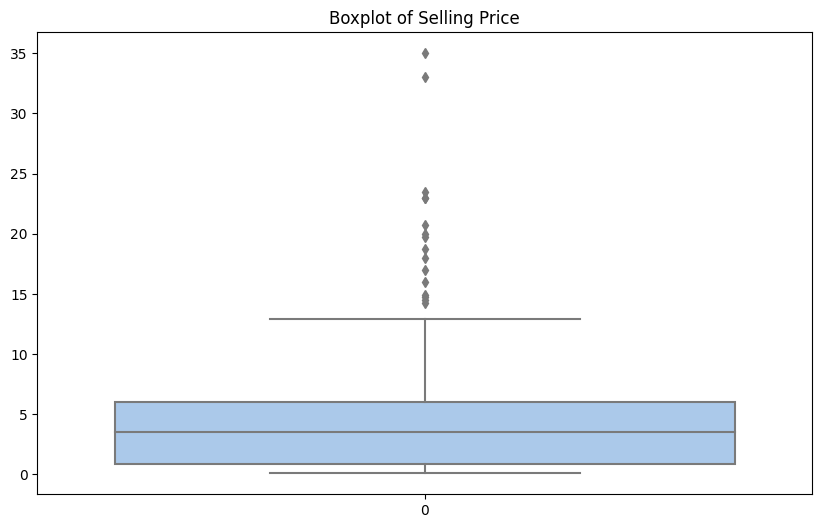

In [12]:
# Check for outliers using boxplots
plt.figure(figsize=(10,6))
sns.boxplot(df['Selling_Price'],palette='pastel')
plt.title('Boxplot of Selling Price')
plt.show()

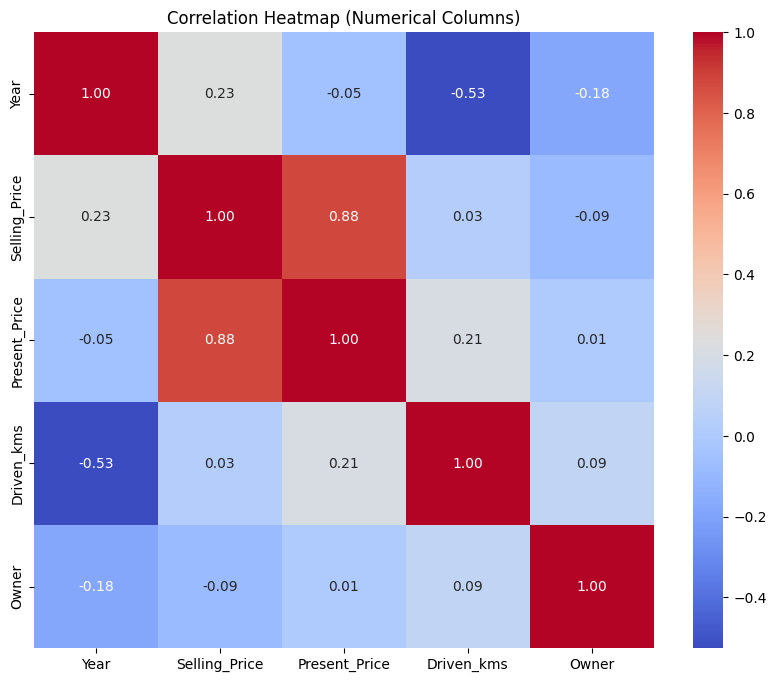

In [13]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

**Observation**

`Strong Positive Correlation`: Selling Price and Present Price have a very strong positive correlation indicating a nearly perfect linear relationship. This makes sense as present market value likely influences selling price.

`Year's Influence`: Year seems weakly negatively correlated with Selling Price, Present Price, and Driven_Kms. Newer cars (lower Year values) tend to have higher selling prices, lower present prices, and lower driven kilometers.

`Mileage Matters`: Driven_Kms shows a weak negative correlation with Selling Price and Present Price. Cars with lower mileage (lower Driven_Kms values) tend to sell for more.

<Figure size 1000x600 with 0 Axes>

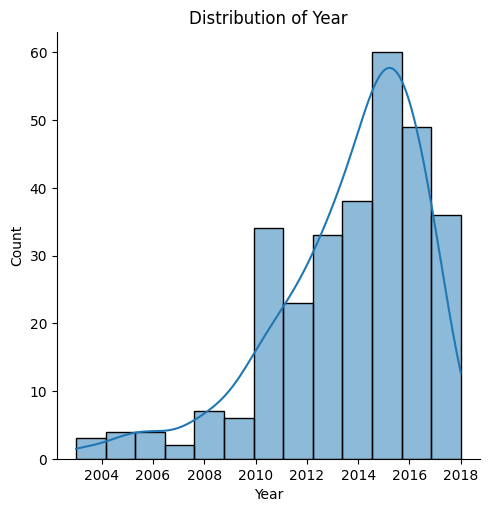

<Figure size 1000x600 with 0 Axes>

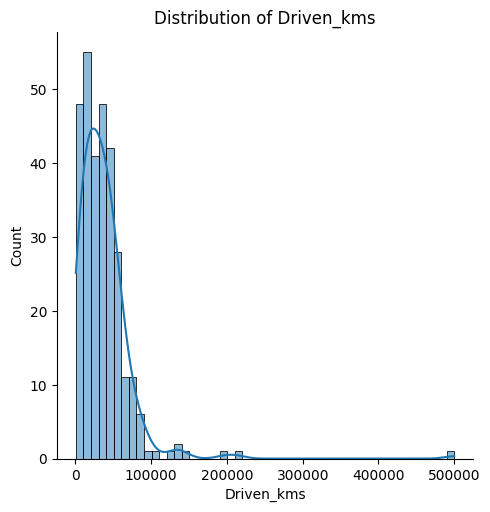

<Figure size 1000x600 with 0 Axes>

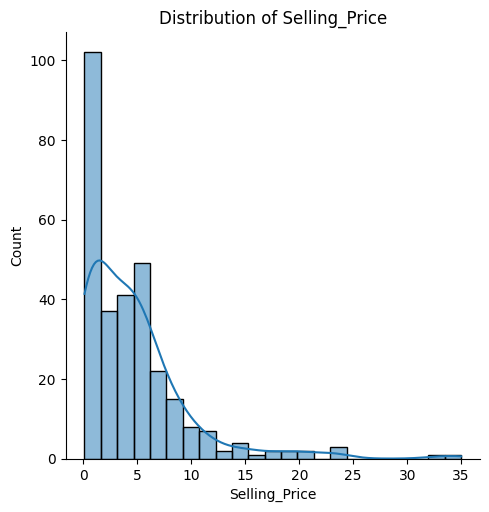

<Figure size 1000x600 with 0 Axes>

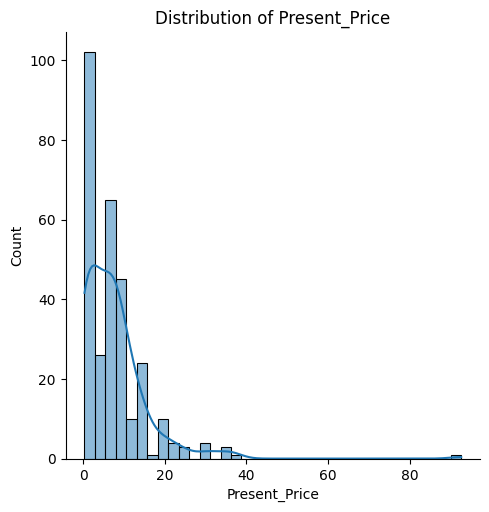

In [14]:
# Distribution of Numerical Features
numerical_features=['Year','Driven_kms','Selling_Price','Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.displot(data=df,x=feature,kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

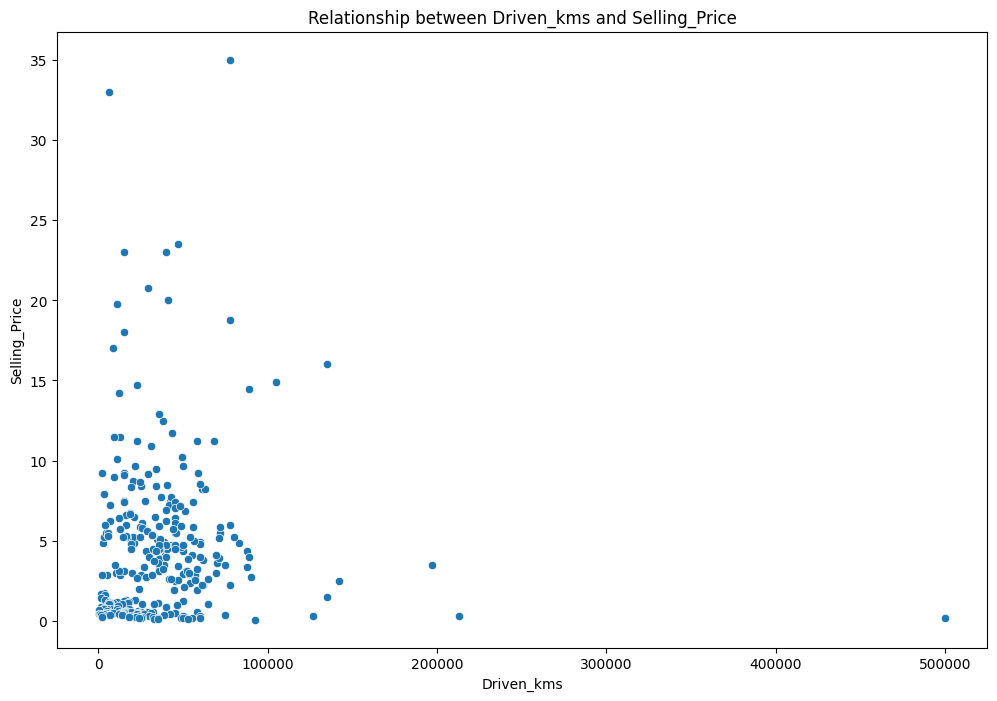

In [15]:
# Scatter plots
plt.figure(figsize=(12,8))
sns.scatterplot(x='Driven_kms',y='Selling_Price',data=df)
plt.title('Relationship between Driven_kms and Selling_Price')
plt.show()

The plot suggests a negative correlation between Driven_Kms and Selling_Price. Cars with higher driven kilometers tend to sell for less.

`Scatter plots` are commonly used in situations where you want to visualize the relationship between two continuous variables. Here are some common scenarios:

`Correlation Analysis`: Scatter plots are often used to visually inspect the relationship between two variables to determine if there's a correlation between them. For example, you might use a scatter plot to see if there's a relationship between the amount of rainfall and the yield of crops.

`Pattern Recognition`: Scatter plots can help identify patterns or trends in data. For instance, you might use a scatter plot to see if there's a linear or nonlinear relationship between two variables.

`Outlier Detection`: Scatter plots can also help in identifying outliers in data. Outliers are data points that deviate significantly from the rest of the data. By visualizing the data in a scatter plot, outliers can often be spotted more easily.

`Comparison of Data Sets`: Scatter plots can be used to compare two different data sets. For example, you might use scatter plots to compare the performance of two different products or the results of two different experiments.

`Regression Analysis`: Scatter plots are commonly used in regression analysis to visualize the relationship between the independent and dependent variables. This helps in understanding how well the data fits the regression model.

`Quality Control`: In manufacturing or scientific experiments, scatter plots can be used to analyze the relationship between different variables to ensure quality control and identify any patterns or discrepancies.

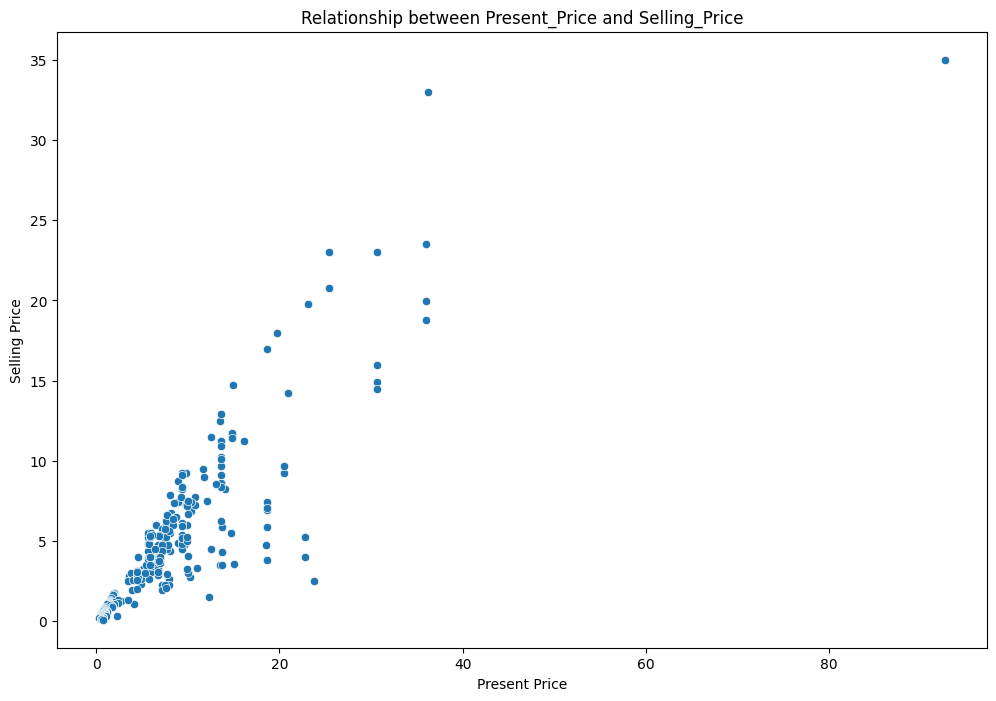

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Present_Price and Selling_Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

plt.show()

Price Match: The plot reveals a strong positive correlation between `Present Price` and `Selling Price`. Cars with a higher present market value tend to sell for more.

Market Influence: This suggests the present market value heavily influences the final selling price.

Then, we start to count plots of categorical features.

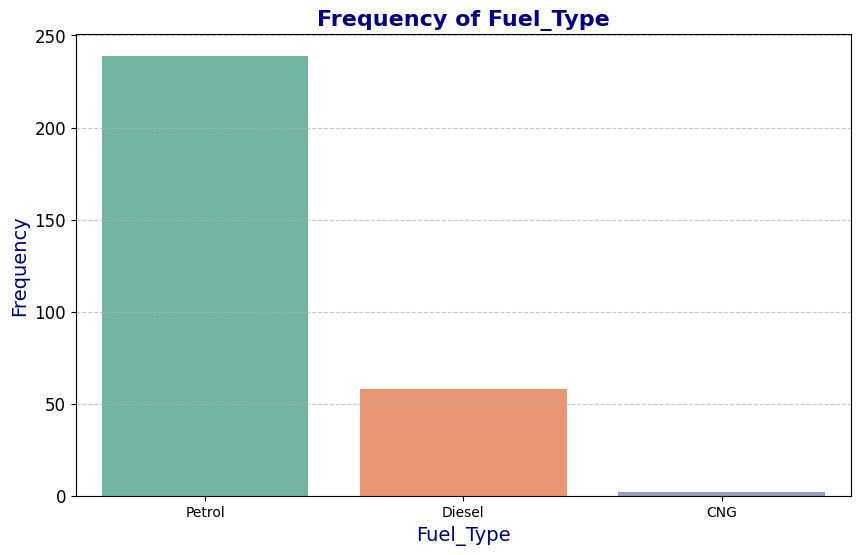

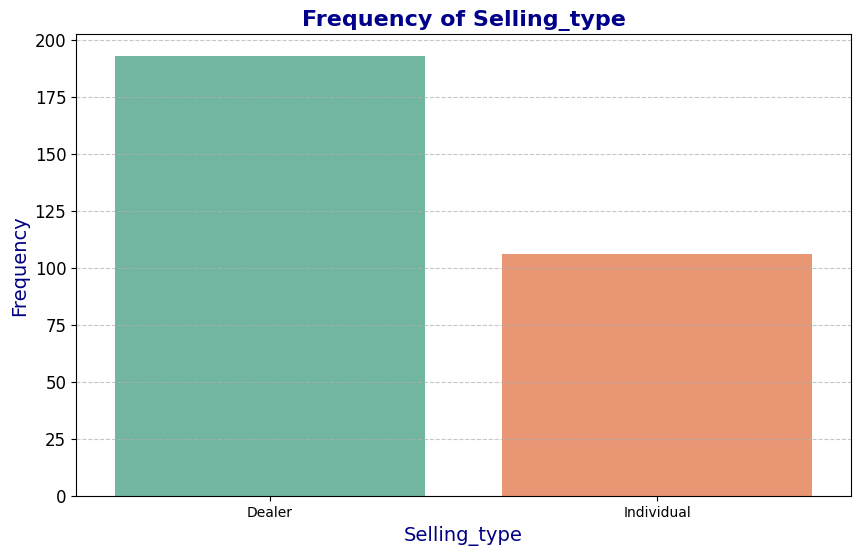

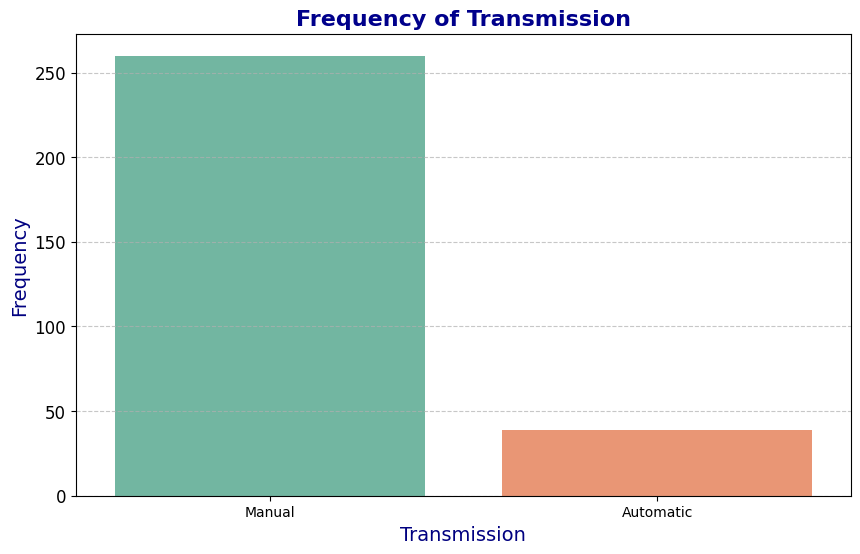

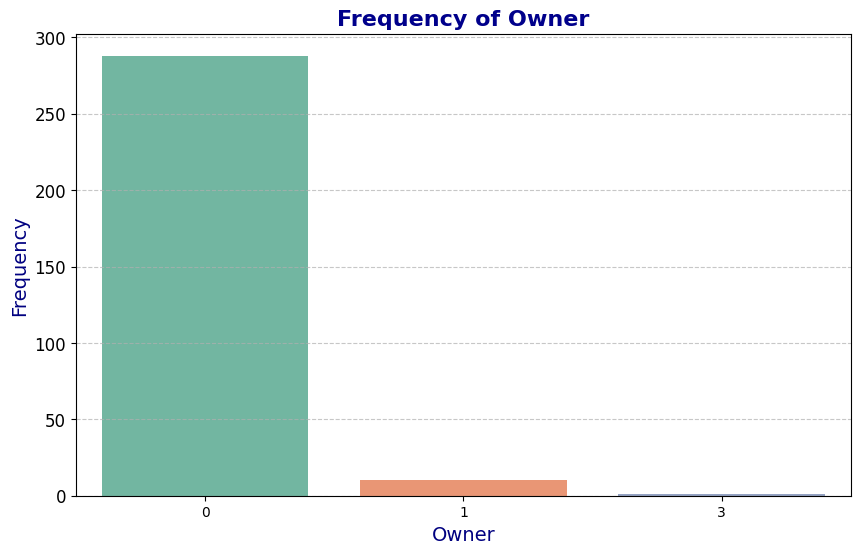

In [17]:
# Definea color palette for the plots
colors=sns.color_palette("Set2")
categorical_features=['Fuel_Type', 'Selling_type', 'Transmission','Owner']
# Plot each caterical feature
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=feature,data=df,palette=colors)
    plt.title(f'Frequency of {feature}',fontsize=16,color='darkblue',fontweight='bold')
    plt.xlabel(f'{feature}',fontsize=14,color='navy')
    plt.ylabel('Frequency',fontsize=14,color='navy')
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [18]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

 Top 20 Car Models by Frequency

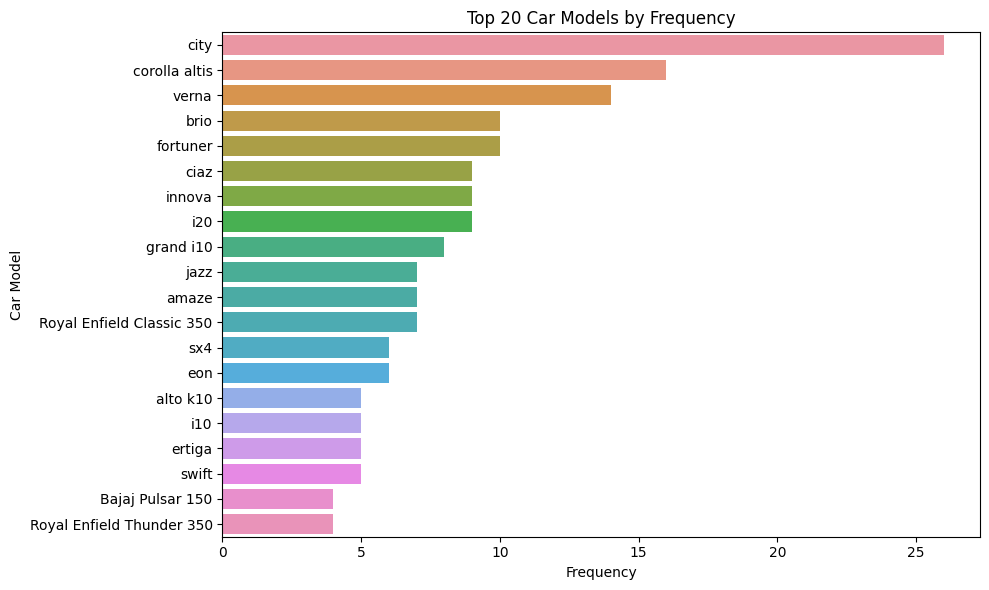

In [19]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

Top 20 Car Models by Average Price

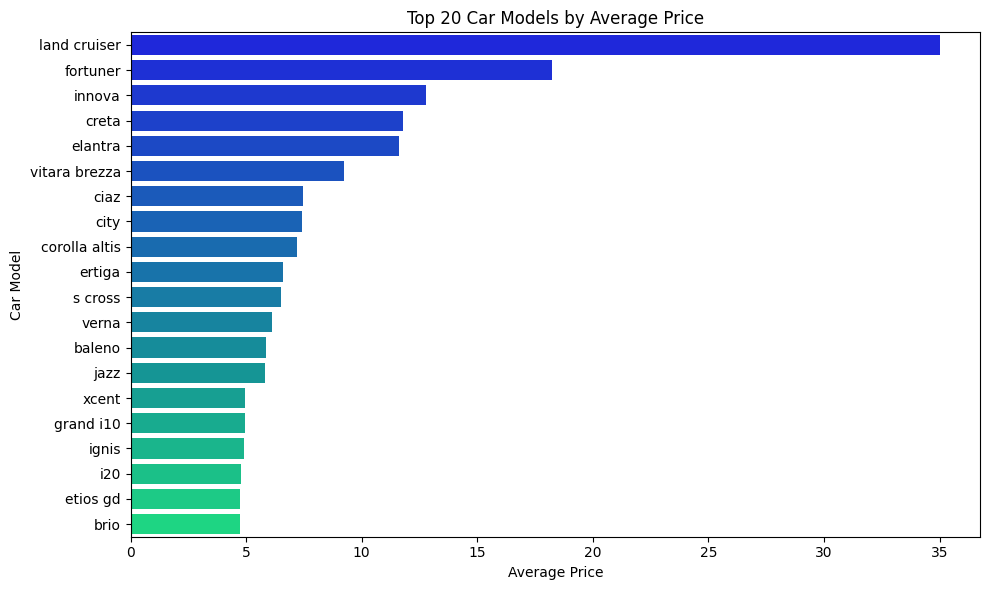

In [20]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='winter')
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

**Credit**:

https://www.kaggle.com/code/noormuhammad106/autocar-eda-price-prediction-analysis